(4521, 17)
(4521, 17)
(4521, 4)


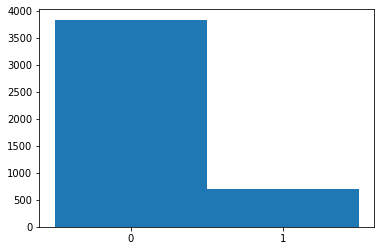

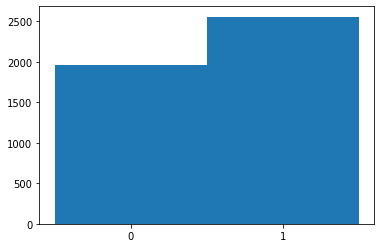

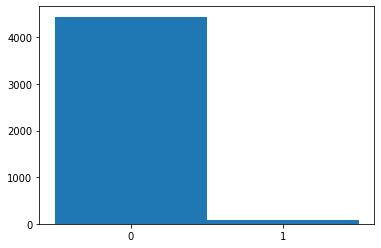

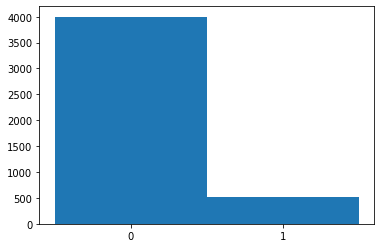

In [140]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

plt.hist(loan, bins=[-.5,.5,1.5])
plt.xticks((0,1))
plt.show()

plt.hist(housing, bins=[-.5,.5,1.5])
plt.xticks((0,1))
plt.show()

plt.hist(default, bins=[-.5,.5,1.5])
plt.xticks((0,1))
plt.show()

plt.hist(response, bins=[-.5,.5,1.5])
plt.xticks((0,1))
plt.show()

In [141]:
loan.value_counts()

0    3830
1     691
Name: loan, dtype: int64

In [146]:
loan.describe()

count    4521.000000
mean        0.152842
std         0.359875
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: loan, dtype: float64

In [143]:
housing.value_counts()

1    2559
0    1962
Name: housing, dtype: int64

In [144]:
default.value_counts()

0    4445
1      76
Name: default, dtype: int64

In [145]:
response.value_counts()

0    4000
1     521
Name: response, dtype: int64

In [148]:
bank1=bank[bank.response=='yes']

In [149]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


In [6]:
bank=pd.get_dummies(bank)
print([[bank.columns],[bank.dtypes]])

[[Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'response_no', 'response_yes'],
      dtype='object')], [age                    int64
balance                int

In [151]:
bank1.loan.value_counts()

no     478
yes     43
Name: loan, dtype: int64

In [152]:
bank1.default.value_counts()

no     512
yes      9
Name: default, dtype: int64

In [153]:
bank1.housing.value_counts()

no     301
yes    220
Name: housing, dtype: int64

In [156]:
bank1.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.168447,-0.052070,-0.036333,-0.065831,0.050716,-0.011920
balance,0.168447,1.000000,-0.038578,-0.120070,-0.028038,0.013520,0.020503
day,-0.052070,-0.038578,1.000000,0.036100,0.137796,-0.037339,-0.051234
duration,-0.036333,-0.120070,0.036100,1.000000,0.234318,-0.154891,-0.155493
campaign,-0.065831,-0.028038,0.137796,0.234318,1.000000,-0.084879,-0.098632
pdays,0.050716,0.013520,-0.037339,-0.154891,-0.084879,1.000000,0.518231
previous,-0.011920,0.020503,-0.051234,-0.155493,-0.098632,0.518231,1.000000


In [28]:
X=pd.DataFrame(bank[['loan_yes','default_yes','housing_yes','response_yes']])

In [29]:
print(X)

      loan_yes  default_yes  housing_yes  response_yes
0            0            0            0             0
1            1            0            1             0
2            0            0            1             0
3            1            0            1             0
4            0            0            1             0
...        ...          ...          ...           ...
4516         0            0            1             0
4517         1            1            1             0
4518         0            0            0             0
4519         0            0            0             0
4520         1            0            1             0

[4521 rows x 4 columns]


In [85]:
X.response_yes.value_counts()

0    4000
1     521
Name: response_yes, dtype: int64

In [57]:
RANDOM_SEED = 1
import random
trainnum=random.sample(range(0,4521),900)

In [59]:
Train=X.loc[trainnum]
Test=X.drop(X.index[trainnum])

In [60]:
from sklearn.utils import resample

In [61]:
minority=Train[Train['response_yes']==1]
majority=Train[Train['response_yes']==0]
newbank=resample(minority, replace=True, n_samples=len(majority), random_state=123)

In [62]:
newbank=pd.concat([majority,newbank])

In [63]:
newbank.response_yes.value_counts()

1    791
0    791
Name: response_yes, dtype: int64

In [64]:
newbank

,loan_yes,default_yes,housing_yes,response_yes
227,0,0,1,0
4439,0,0,0,0
3508,0,0,0,0
589,1,0,0,0
791,0,0,1,0
...,...,...,...,...
1180,0,0,1,1
3305,0,0,0,1
2370,0,0,1,1
3538,0,0,0,1


In [66]:
X_train=np.array(newbank[['loan_yes','default_yes','housing_yes']])
y_train=np.array(newbank[['response_yes']])
X_test=np.array(Test[['loan_yes','default_yes','housing_yes']])
y_test=np.array(Test[['response_yes']])

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1582, 3)
(1582, 1)
(3621, 3)
(3621, 1)


In [73]:
y_train=y_train.reshape(1582,)
y_test=y_test.reshape(3621,)

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1582, 3)
(1582,)
(3621, 3)
(3621,)


In [88]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import confusion_matrix
nfolds=10
bern=BernoulliNB()

In [165]:
berncvs=cvs(bern,X_train,y_train,cv=nfolds)

In [166]:
berncvs

array([0.58490566, 0.60377358, 0.60126582, 0.58860759, 0.56329114,
       0.62025316, 0.60126582, 0.65189873, 0.65189873, 0.60126582])

In [91]:
bern=bern.fit(X_train,y_train)
pred=bern.predict(X_test)

In [133]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[2090 1119]
 [ 192  220]]


Out of 3209 instances of 'no', correctly predicted 2090 of them.
Out of 412 instances of 'yes', correctly predicted 220 of them.

In [93]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != pred).sum()))

Number of mislabeled points out of a total 3621 points : 1311


In [168]:
# Accuracy
(cm[0,0]+cm[1,1])/np.sum(cm)

0.6379453189726595

In [113]:
#PPV
cm[1,1]/(cm[1,0]+cm[1,1])

0.5339805825242718

In [114]:
#NPV
cm[0,0]/(cm[0,1]+cm[0,0])

0.6512932377687753

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      3209
           1       0.16      0.53      0.25       412

    accuracy                           0.64      3621
   macro avg       0.54      0.59      0.51      3621
weighted avg       0.83      0.64      0.70      3621



In [161]:
from sklearn.metrics import roc_curve
%matplotlib inline

y_pred_prob=bern.predict_proba(X_test)[:,1]

fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob)

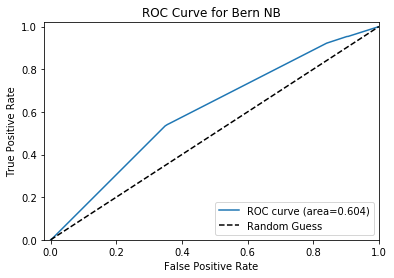

In [162]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label='ROC curve (area=%0.3f)'%roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve for Bern NB')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr=LogisticRegression()

In [163]:
lrcvs=cvs(lr,X_train,y_train, cv=nfolds)

In [164]:
lrcvs

array([0.58490566, 0.60377358, 0.60126582, 0.58860759, 0.56329114,
       0.62658228, 0.60126582, 0.65822785, 0.65189873, 0.60126582])

In [125]:
lr=lr.fit(X_train,y_train)

In [126]:
pred1=lr.predict(X_test)

In [127]:
pred1

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [128]:
lr.predict_proba(X_test)[:,1]

array([0.60438298, 0.26880103, 0.26880103, ..., 0.60438298, 0.60438298,
       0.26880103])

In [129]:
lr.score(X_train,y_train)

0.6093552465233881

In [124]:
cm=confusion_matrix(y_test,pred1)
print(cm)

[[2090 1119]
 [ 192  220]]


In [130]:
lr.score(X_test,y_test)

0.6379453189726595

In [132]:
cm1=confusion_matrix(y_test,pred1)
print(cm1)

[[2090 1119]
 [ 192  220]]


Out of 3209 instances of 'no', correctly predicted 2090 of them.
Out of 412 instances of 'yes', correctly predicted 220 of them.

In [134]:
#Accuracy
(cm1[0,0]+cm1[1,1])/np.sum(cm1)

0.6379453189726595

In [135]:
#PPV
cm1[1,1]/(cm1[1,0]+cm1[1,1])

0.5339805825242718

In [136]:
#NPV
cm1[0,0]/(cm1[0,1]+cm1[0,0])

0.6512932377687753

In [157]:
print(mycvs)
print(mycvs1)

[0.58490566 0.60377358 0.60126582 0.58860759 0.56329114 0.62025316
 0.60126582 0.65189873 0.65189873 0.60126582]
[0.58490566 0.60377358 0.60126582 0.58860759 0.56329114 0.62658228
 0.60126582 0.65822785 0.65189873 0.60126582]


In [158]:
from sklearn.metrics import roc_curve
%matplotlib inline

y_pred_prob=lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob)

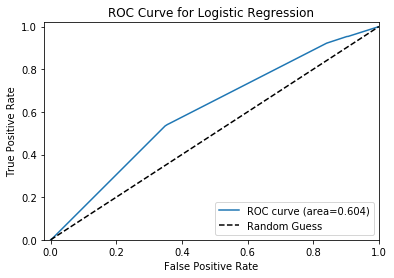

In [160]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label='ROC curve (area=%0.3f)'%roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve for Logistic Regression')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [167]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      3209
           1       0.16      0.53      0.25       412

    accuracy                           0.64      3621
   macro avg       0.54      0.59      0.51      3621
weighted avg       0.83      0.64      0.70      3621

